<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#Prerequisite-Imports" data-toc-modified-id="Prerequisite-Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prerequisite Imports</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Preparation</a></span></li></ul></li></ul></div>

# Exploratory Analysis

## Prerequisite Imports
Import the necessary libraries. **_numpy_** library provides numerical computing tools for python. The **_pandas_** library provides data analysis tools and data structures for data wrangling and munging. **_statsmodels_** provides various statistical tools, and **_matplotlib_** and **_seaborn_** libraries both provide plotting tools.

In [20]:
# Required Imports
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot as acfplot
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.tsa.api as smt
import statsmodels.api as sm

import scipy.stats as scs


%matplotlib inline

Below we define a method for plotting time series data. The method is used to plot the time series, autocorrelation (ACF), partial autocorrelation (PACF), QQ and probability plots (normal). Additionally, we get the kernel density plot and the ACF plot with 95% and 99% confidence intervals. 

In [21]:
# Commonly used methods

def plot_acfs(y, lags=None, style='seaborn-whitegrid'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        layout = (4, 2)
        
        plt.figure(figsize=(12, 20))
        # Plot the Time Series
        ax1 = plt.subplot2grid(layout, (0,0), colspan=2)
        ax1.set_title('Time Series Analysis Plots')
        y.plot(ax=ax1)
        
        # Plot the Correlogram (ACF)
        ax2 = plt.subplot2grid(layout, (1, 0))
        smt.graphics.plot_acf(y, ax=ax2, lags=lags, alpha=0.05)
        
        # Plot the Correlogram (PACF)
        ax3 = plt.subplot2grid(layout, (1, 1))
        smt.graphics.plot_pacf(y, ax=ax3, lags=lags, alpha=0.05)
                
        # QQ Plot
        ax3 = plt.subplot2grid(layout, (2, 0))
        sm.qqplot(y, line='s', ax=ax3)
        ax3.set_title('QQ Plot')
        
        # Probability Plot
        ax4 = plt.subplot2grid(layout, (2, 1))
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=ax4)
        
        # Distribution Histogram
        ax5 = plt.subplot2grid(layout, (3,0))
        sns.distplot(y, ax=ax5)
        
        # ACF line plot with CIs
        ax6 = plt.subplot2grid(layout,(3,1))
        acfplot(y, ax=ax6)
        ax6.set_title('ACF Plot')

## Data Preparation


In [22]:
from locale import atof
import datetime as dt

raw_data = pd.read_csv("/home/dna/PycharmProjects/predictive-ts-analysis/data/ds1-hourly.csv")
data = raw_data.pivot(index='Timeline', columns='filters', values='Count')
# data = data.applymap(lambda x: float(x.split()[0].replace(',', '')))
data = data.set_index(pd.DatetimeIndex(data.index))
print(data.head())
print(data.shape)

filters              CMSPool  CMSProd  LCGAdmin  LIGO  Others  PhEDEx
Timeline                                                             
2017-03-09 10:00:00      746      783        48     0       0     278
2017-03-09 11:00:00     4008     4923       264     8       0    1233
2017-03-09 12:00:00     4979     6437       274     8       0    1688
2017-03-09 13:00:00     9404     6174       296     8       0    1248
2017-03-09 14:00:00     8585     5312       279     4       0    1577
(192, 6)


/home/dna/PycharmProjects/predictive-ts-analysis/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


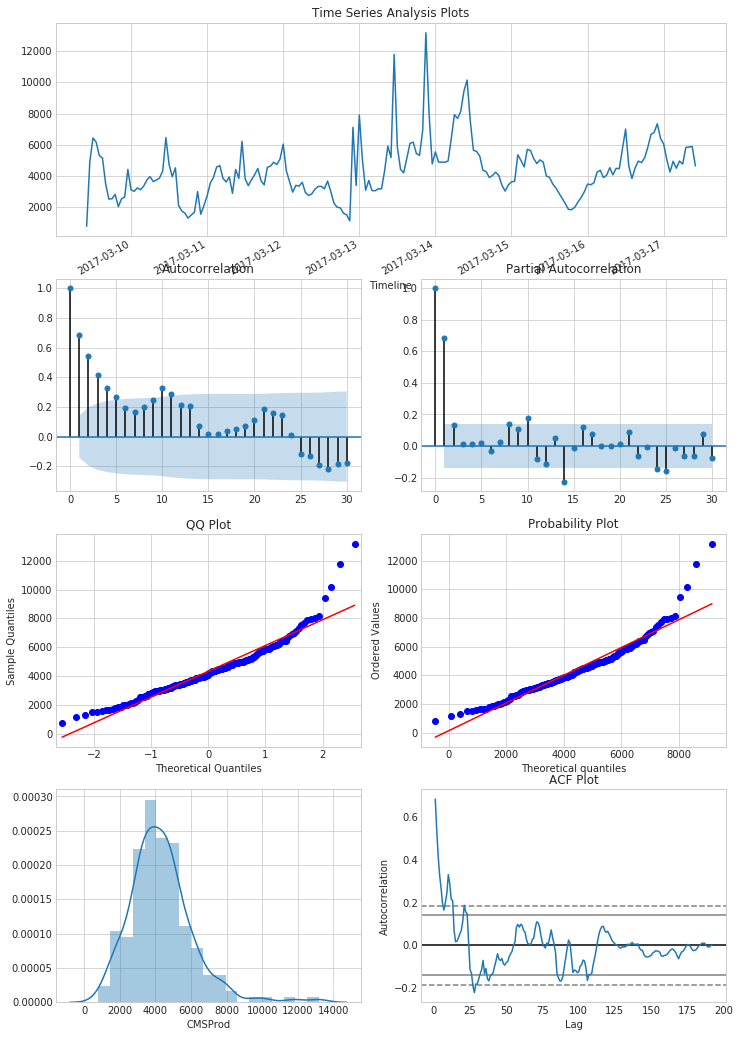

In [10]:
cmsprodSeries = data['CMSProd']
plot_acfs(cmsprodSeries, lags=30)

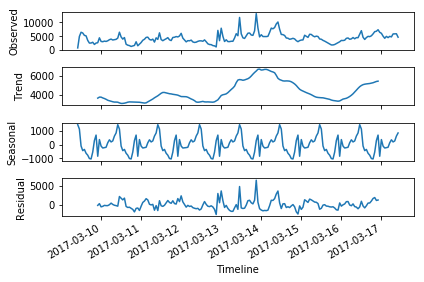

In [11]:
data_decomposed_additive = smt.seasonal_decompose(cmsprodSeries, model='additive', freq=24)
dc_plot_add = data_decomposed_additive.plot()

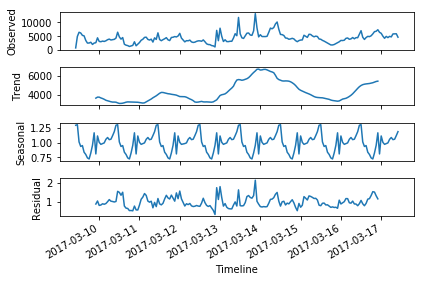

In [12]:
data_decomposed_mul = smt.seasonal_decompose(cmsprodSeries, model='multiplicative', freq=24)
dc_plot_mul = data_decomposed_mul.plot()

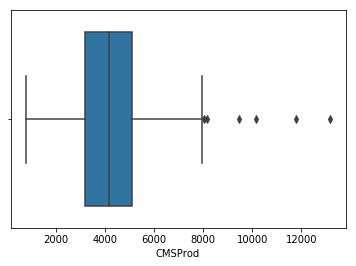

In [13]:
bp = sns.boxplot(cmsprodSeries)